# TK2

* MELISSA CHRISTIAN DINATA (melissa.dinata@binus.ac.id)
* STEPHEN ROYANMART PATRICK (stephen.patrick@binus.ac.id)
* FIRDA MAYANTI (firda.mayanti@binus.ac.id)


# Study of Public Transportation Feeder Effectiveness with K-Means Clustering Algorithm in DKI Jakarta  

This research aims to study public transportation unit management in DKI Jakarta to analyze route efficiency and number of passengers. Using data sets from Trans Jakarta datasets. The analysis focus on how effective the microtrans, integrated public Transportaion and BRT route. The purpose of this research is that it can contribute as a reference and recommendation for local government in making policy on managing transportation to fulfill transport accommodation for Jakarta’s citizens in the future. 

## INTRODUCTION  

According to the report, owing to safety, comfort, and the absence of control of private car ownership, just 25% of Jakarta's population utilizes public transit. The failure to use public transportation has a costly cascading impact. losses, as well as an overabundance of road space, which causes congestion and traffic accidents. If the number of vehicles on the road continues to rise, it may result in a shift in land use from green to concrete or road, increased fuel consumption, emissions, pollution, and a slew of environmental and health consequences (D. Jakarta, “Jakarta Smart City,” 2020.). 

Big data has several potential applications and implications in the field of transportation. Big data has been applied into transportation research across a wide range of themes since its inception in the early 2010s, including service provision, traffic, environmental consequences, infrastructure/route upgrades, and service and human behavior. Chen et al. (2016). With the continual acceleration of transportation city growth, the number of urban cars is fast expanding, and each city has varied degrees of traffic congestion. We can understand the characteristics of traffic flow distribution in different times and spaces by analyzing data from the intelligent transportation system utilizing big data technologies. It is possible to estimate the time and road segment where traffic congestion will occur in the future by studying the traffic index of the road segment. L. Qiv(2008). 

Understanding passenger behavior assists transportation agencies and other decision-makers to make better decisions. Big data has been utilized in public transportation to better understand regular behaviors, trends, extreme travel behaviors, and the factors that influence these behaviors. (Welch, T. F., & Widita, A. 2019). for example, the presence of big data allows for the performance of appropriate demand evaluations. Researchers used smart card data to conduct policy research on the impact of a new transport line (Line 4 in Nanjing, China) opening on passenger flow and travel time. (Fu & Gu, 2018). 

According to Parekits (2014), Traffic congestion in Jakarta is mostly driven by unregulated automobile expansion, insufficient availability and utilization of public transportation, and poor traffic discipline. Congestion has a negative influence on time and economic value because of slower travel speeds and longer journey times, waste of energy, and vehicle wear, which results in high vehicle maintenance costs, creates air pollution, and increases tension among road users.

This study is organized as follows: Section 2 presents an exhaustive assessment of the important works done in this area of inquiry. Section 3 gives the background and suggested model, followed by Section 4's results and discussion, and Section 5 concludes the study. 

### 1. Import required python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
import numpy as np

### 2. Create list according to dataset filename prefix

In [2]:
prefix = 'data-penumpang-bus-transjakarta'
files = [f for f in os.listdir() if f.startswith(prefix)]
files

['data-penumpang-bus-transjakarta-agustus-2021.csv',
 'data-penumpang-bus-transjakarta-april-2021.csv',
 'data-penumpang-bus-transjakarta-desember-2021.csv',
 'data-penumpang-bus-transjakarta-februari-2021.csv',
 'data-penumpang-bus-transjakarta-januari-2021.csv',
 'data-penumpang-bus-transjakarta-juli-2021.csv',
 'data-penumpang-bus-transjakarta-juni-2021.csv',
 'data-penumpang-bus-transjakarta-maret-2021.csv',
 'data-penumpang-bus-transjakarta-mei-2021.csv',
 'data-penumpang-bus-transjakarta-november-2021.csv',
 'data-penumpang-bus-transjakarta-oktober-2021.csv',
 'data-penumpang-bus-transjakarta-september-2021.csv']

### 3. Combine all dataset csv files into a single dataframe

In [3]:
df_combi = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_combi = pd.concat([df_combi, df], ignore_index=True)
    
df_combi['kode_nama_trayek'] = df_combi['kode_trayek'] + " " + df_combi['trayek']
df_combi.head() #choose the first 5 as preview

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kode_nama_trayek
0,2021,8,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,20245,JAK.88 Terminal Tanjung Priok - Ancol Barat
1,2021,8,Mikrotrans,JAK.85,Bintara - Cipinang Indah,19989,JAK.85 Bintara - Cipinang Indah
2,2021,8,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,33638,JAK.84 Terminal Kampung Melayu - Kapin Raya
3,2021,8,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,46653,JAK.80 Rawa Buaya - Rawa Kompeni
4,2021,8,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,47157,JAK.77 Tanjung Priok - Jembatan Item


Output is a dataframe called ```df_combi```. Next load another dataset and create new dataframe ```df_trayek```

In [4]:
df_trayek = pd.read_csv('list-trayek.csv')
df_trayek.head() #choose the first 5 as preview

,kode_nama_trayek,jarak_km,waktu_min,n_stops,n_unit
0,JAK.88 Terminal Tanjung Priok - Ancol Barat,9.6,30,24,16
1,JAK.85 Bintara - Cipinang Indah,11.0,35,27,10
2,JAK.84 Terminal Kampung Melayu - Kapin Raya,7.9,25,20,15
3,JAK.80 Rawa Buaya - Rawa Kompeni,6.6,20,17,10
4,JAK.77 Tanjung Priok - Jembatan Item,12.3,40,27,16


### 4. Dataset is clean, thus next is dataset merge to combine information from another dataset.

Both dataframes needs tobe merged based on the same column name ```kode_name_trayek```, and data from df_trayek will be merged to the left (joined with ```df_combi```).

In [5]:
df_merge = pd.merge(df_combi,df_trayek,on='kode_nama_trayek',how='left')
df_merge = df_merge.sort_values(by='bulan')

The output of the merge is new dataframe called ```df_merge```. Once ready, create list for transportation modes and months based on unique value of the ```df_merge``` column for iteration purpose later.

In [6]:
modes = df_merge['jenis'].unique().tolist()

In [7]:
months = df_merge['bulan'].unique().tolist()

In [8]:
df_merge['jumlah_penumpang_harian_per_unit'] = df_merge['jumlah_penumpang'] / df_merge['n_unit'] // 30
df_merge.head() #choose the first 5 as preview

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kode_nama_trayek,jarak_km,waktu_min,n_stops,n_unit,jumlah_penumpang_harian_per_unit
533,2021,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,JAK.37 Cililitan - Condet via Kayu Manis,7.0,21.0,15.0,14.0,109.0
531,2021,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,JAK.39 Kalimalang - Duren Sawit,9.5,30.0,22.0,16.0,113.0
532,2021,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,JAK.38 Bulak Ringin - Kampung Rambutan,8.1,24.0,18.0,17.0,86.0
534,2021,1,Mikrotrans,JAK.36,Cilangkap - Cililitan,87842,JAK.36 Cilangkap - Cililitan,4.1,15.0,11.0,12.0,244.0
535,2021,1,Mikrotrans,JAK.35,Pangkalan Jati - Rawamangun,29321,JAK.35 Pangkalan Jati - Rawamangun,7.1,22.0,16.0,13.0,75.0


### 5. Descriptive Analysis of the Dataset

#### 5.1 Familiarization

In [9]:
print("Number of columns: {}".format(len(df_merge.columns)))

Number of columns: 12


In [10]:
df_merge.dtypes

tahun                                 int64
bulan                                 int64
jenis                                object
kode_trayek                          object
trayek                               object
jumlah_penumpang                      int64
kode_nama_trayek                     object
jarak_km                            float64
waktu_min                           float64
n_stops                             float64
n_unit                              float64
jumlah_penumpang_harian_per_unit    float64
dtype: object

#### 5.2 Histogram Distribusi Jumlah Penumpang Group By Jenis Moda Transportasi

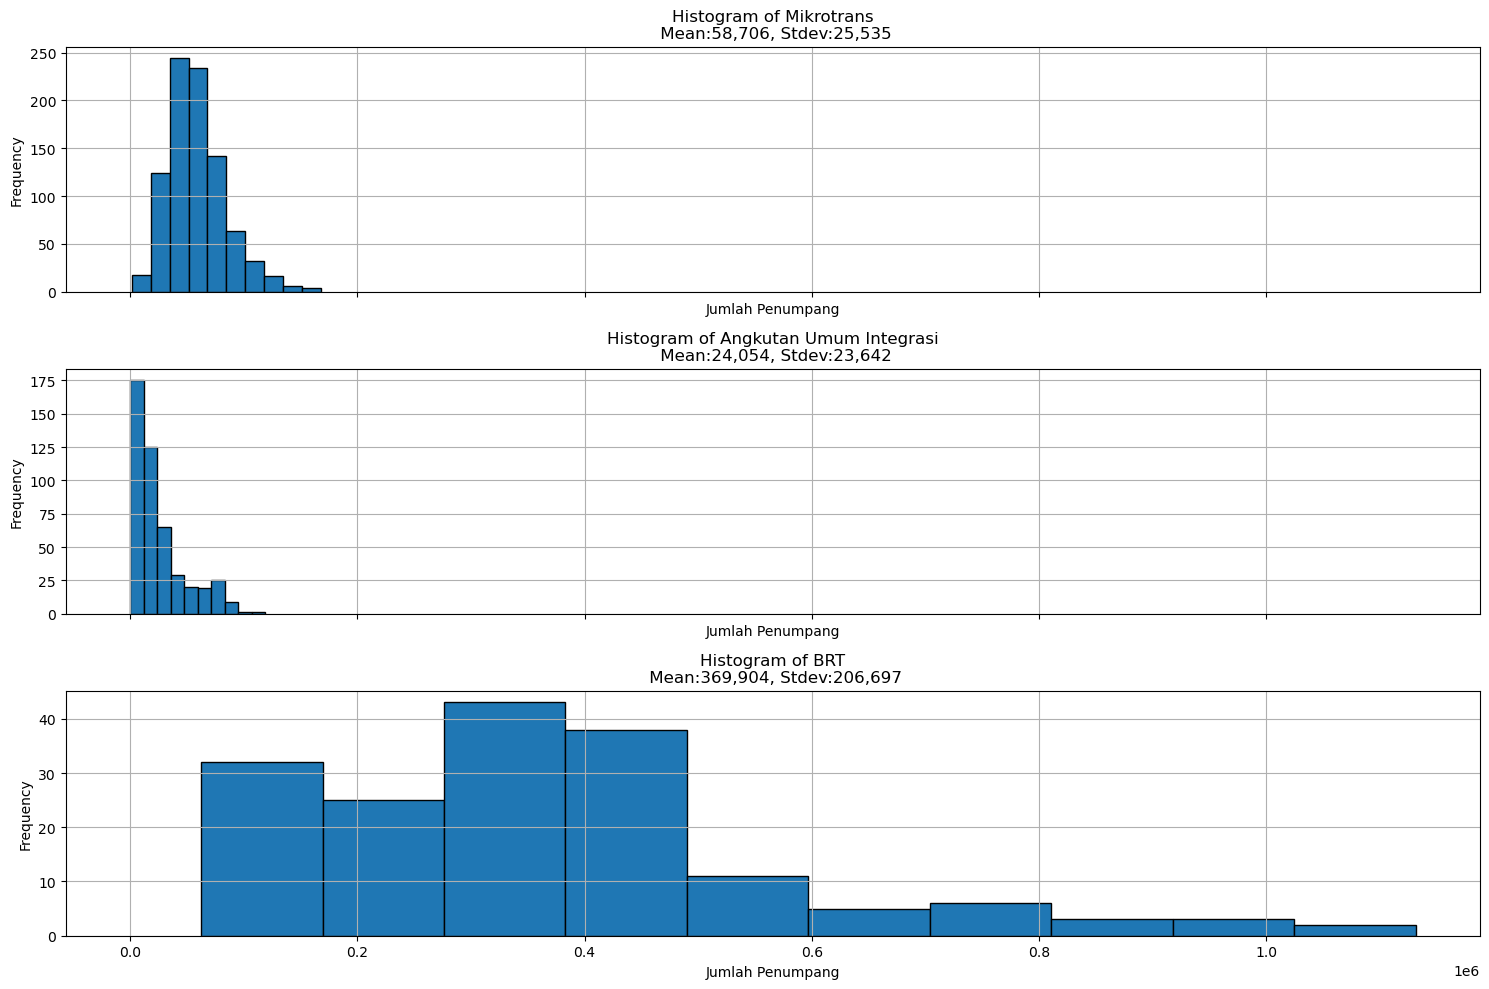

In [11]:
fig, ax = plt.subplots(3,1, figsize=(15, 10),sharex=True)

for i, mode in enumerate(modes):
    _data = df_merge[(df_merge['jenis'] == mode)]['jumlah_penumpang']
    mean = np.mean(_data)
    std = np.std(_data)
    ax[i].hist(_data,bins=10,edgecolor='black')
    ax[i].set_xlabel("Jumlah Penumpang")
    ax[i].set_ylabel('Frequency')
    ax[i].set_title("Histogram of {}\n Mean:{:,.0f}, Stdev:{:,.0f}".format(mode,mean,std))
    ax[i].grid(True)

plt.tight_layout()
plt.show()

#### 5.3 Boxplot Jumlah Penumpang Group By Jenis Moda Transportasi

Mikrotrans, Median: 55,250
Angkutan Umum Integrasi, Median: 17,270
BRT, Median: 343,265


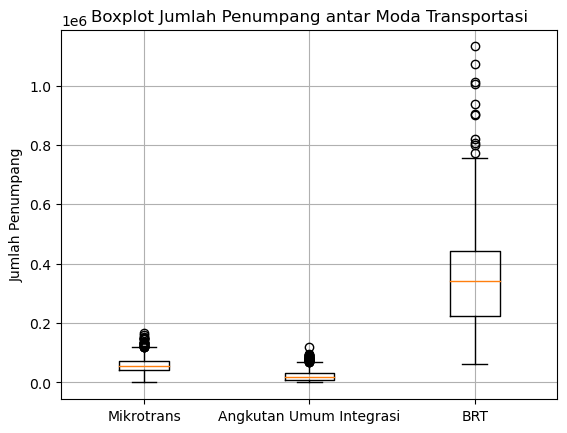

In [12]:
df_boxplot = pd.DataFrame()
boxplot_dict = {}

for i, mode in enumerate(modes):
    _data = df_merge[(df_merge['jenis'] == mode)]['jumlah_penumpang']
    median = np.median(_data)
    print("{}, Median: {:,.0f}".format(mode,median))
    boxplot_dict[mode] = _data.tolist()

values = list(boxplot_dict.values())
plt.boxplot(values)
plt.xticks(range(1, len(boxplot_dict) + 1), boxplot_dict.keys())
plt.ylabel('Jumlah Penumpang')
plt.title("Boxplot Jumlah Penumpang antar Moda Transportasi")
plt.grid(True)
plt.show()

#### 5.4 Scatter Plot antara variable jarak_km, waktu_min, n_stops, n_unit terhadap jumlah penumpang harian.

In [13]:
month_id = widgets.Dropdown(options=months,
                            value=months[0],
                            description='Month',
                            disabled=False)

In [14]:
x_column = df_merge.columns[-5:-1]

In [15]:
def plot_penumpang_harian(id):
    example = df_merge[df_merge['bulan']==months[id]-1]
    fig, ax = plt.subplots(1,len(x_column),figsize=(20,5))

    for i,column in enumerate(x_column):
        for mode in modes:
            if column == 'jumlah_penumpang_harian_per_unit':
                ax[i].axis('off')
                continue
            _data = example[example['jenis'] == mode]
            ax[i].scatter(_data[column],_data['jumlah_penumpang_harian_per_unit'], label=mode)
            ax[i].set_xlabel(column)
            ax[i].set_ylabel('jumlah_penumpang_harian_per_unit')
            ax[i].set_title('Plot \n{} \nvs \n{}'.format(column,'penumpang harian per unit'))
            ax[i].legend(loc=0,fontsize='smaller')

    plt.show()

In [16]:
widgets.interact(plot_penumpang_harian,id=month_id)

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

<function __main__.plot_penumpang_harian(id)>

#### 5.5 Scatter Plot antar variable

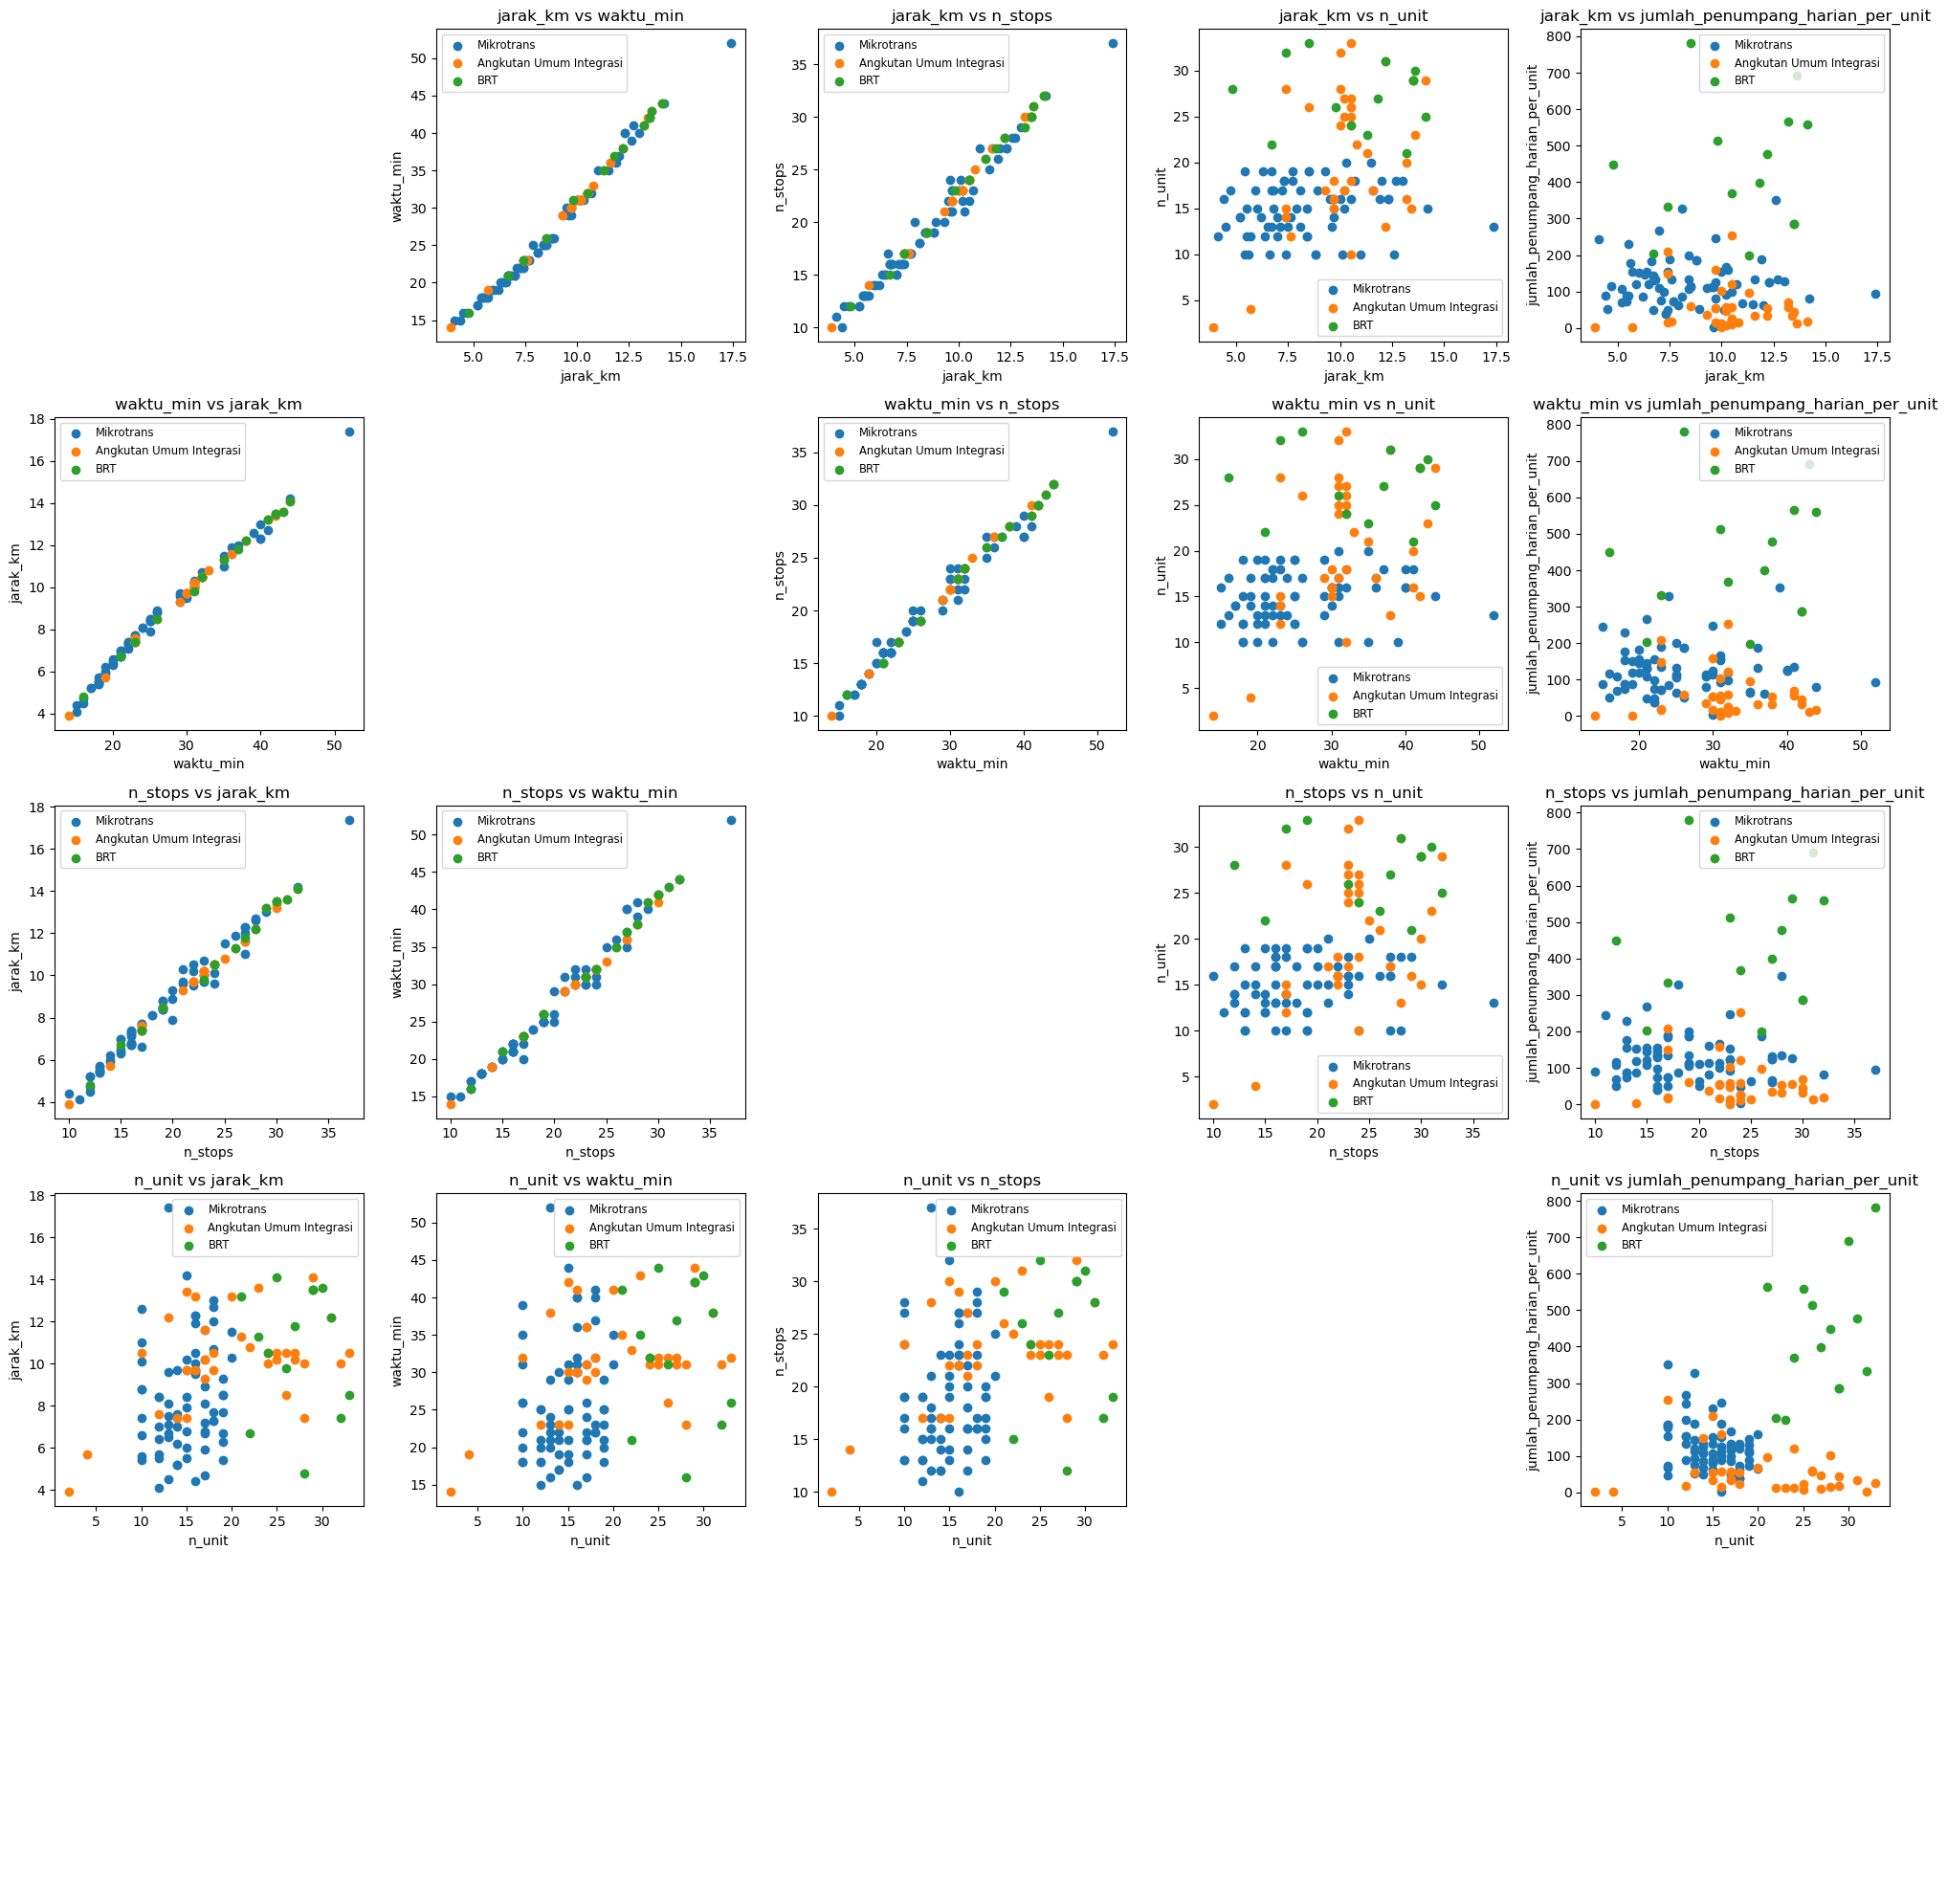

In [17]:
example = df_merge[df_merge['bulan']==1]
variables = df_merge.columns[-5:]

fig, ax = plt.subplots(len(variables),len(variables),figsize=(20,20))

for i, x_column in enumerate(variables):
    for j, y_column in enumerate(variables):

        if i == j or x_column == variables[-1]:
            ax[i,j].axis('off')
            continue
            
        for mode in modes:
            _data = example[example['jenis'] == mode]
            ax[i,j].scatter(_data[x_column], _data[y_column], label=mode)
        ax[i,j].set_xlabel(x_column)
        ax[i,j].set_ylabel(y_column)
        ax[i,j].set_title('{} vs {}'.format(x_column,y_column))
        ax[i,j].legend(fontsize='smaller')
        
plt.tight_layout()
plt.show()

### K-Means Clustering

In [18]:
import os
os.environ['OMP_NUM_THREADS'] = '2'
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## Cluster 1: Unit vs. Jumlah Penumpang Harian

In [19]:
data = df_merge.iloc[:,[10,11]]
data.isna().sum()

n_unit                              10
jumlah_penumpang_harian_per_unit    10
dtype: int64

In [20]:
data = data.dropna(how='any', axis=0)

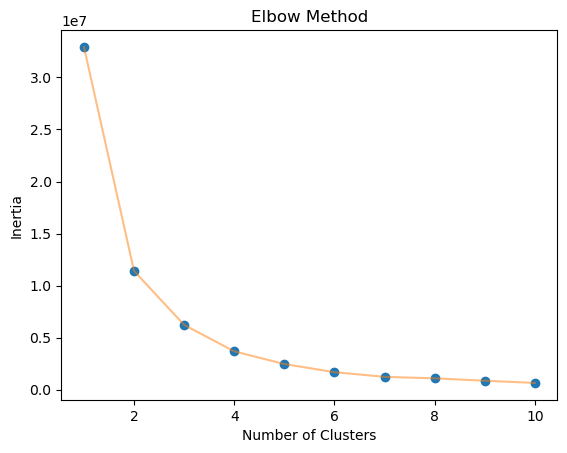

In [21]:
inertia = []
for k in range(1 , 11):
    kmeans = (KMeans(n_clusters = k ,init='k-means++', n_init = 1 ,max_iter=300, random_state= 0) )
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
data

,n_unit,jumlah_penumpang_harian_per_unit
533,14.0,109.0
531,16.0,113.0
532,17.0,86.0
534,12.0,244.0
535,13.0,75.0
...,...,...
285,12.0,245.0
284,14.0,170.0
283,17.0,109.0
296,14.0,152.0


In [23]:
data.iloc[:,0]

533    14.0
531    16.0
532    17.0
534    12.0
535    13.0
       ... 
285    12.0
284    14.0
283    17.0
296    14.0
375    20.0
Name: n_unit, Length: 1509, dtype: float64

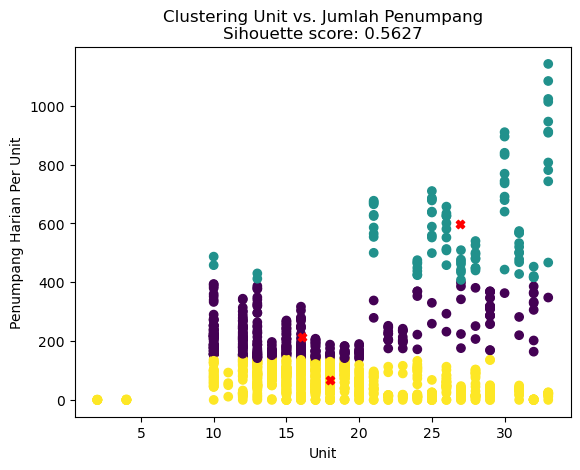

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
kmeans_silhouette = silhouette_score(data, labels)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')

plt.title("Clustering Unit vs. Jumlah Penumpang\nSihouette score: {:.4f}".format(kmeans_silhouette))
plt.xlabel("Unit")
plt.ylabel("Penumpang Harian Per Unit")
'''
for i, centroid in enumerate(centroids):
    plt.annotate("Cluster {}\n({:.1f},{:.1f})".format(i,centroid[0],centroid[1]), (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')
'''
plt.show()

In [25]:
df_merge =df_merge.dropna(how='any', axis=0)

In [26]:
df_merge['cluster'] = labels

In [27]:
df_merge

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kode_nama_trayek,jarak_km,waktu_min,n_stops,n_unit,jumlah_penumpang_harian_per_unit,cluster
533,2021,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,JAK.37 Cililitan - Condet via Kayu Manis,7.0,21.0,15.0,14.0,109.0,2
531,2021,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,JAK.39 Kalimalang - Duren Sawit,9.5,30.0,22.0,16.0,113.0,2
532,2021,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,JAK.38 Bulak Ringin - Kampung Rambutan,8.1,24.0,18.0,17.0,86.0,2
534,2021,1,Mikrotrans,JAK.36,Cilangkap - Cililitan,87842,JAK.36 Cilangkap - Cililitan,4.1,15.0,11.0,12.0,244.0,0
535,2021,1,Mikrotrans,JAK.35,Pangkalan Jati - Rawamangun,29321,JAK.35 Pangkalan Jati - Rawamangun,7.1,22.0,16.0,13.0,75.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021,12,Mikrotrans,JAK.36,Cilangkap - Cililitan,88277,JAK.36 Cilangkap - Cililitan,4.1,15.0,11.0,12.0,245.0,0
284,2021,12,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,71809,JAK.37 Cililitan - Condet via Kayu Manis,7.0,21.0,15.0,14.0,170.0,0
283,2021,12,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,56049,JAK.38 Bulak Ringin - Kampung Rambutan,8.1,24.0,18.0,17.0,109.0,2
296,2021,12,Mikrotrans,JAK.25,Kp. Rambutan - Kalisari,64243,JAK.25 Kp. Rambutan - Kalisari,7.6,23.0,17.0,14.0,152.0,0


## Cluster 2: Jarak Tempuh vs. Jumlah Unit

In [28]:
data = df_merge.iloc[:,[7,10]]
data.isna().sum()

jarak_km    0
n_unit      0
dtype: int64

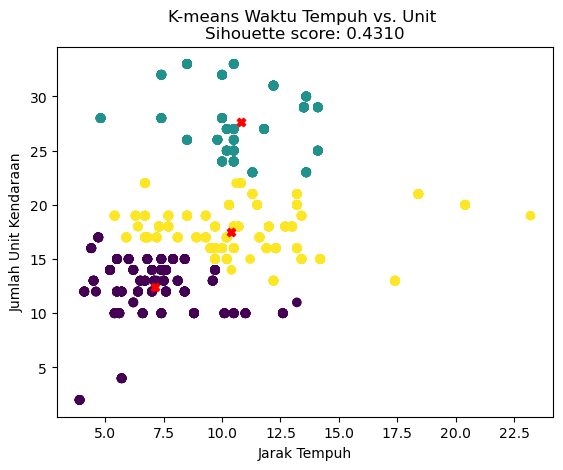

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
kmeans_silhouette = silhouette_score(data, labels)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')

plt.title("K-means Waktu Tempuh vs. Unit \nSihouette score: {:.4f}".format(kmeans_silhouette))
plt.xlabel("Jarak Tempuh")
plt.ylabel("Jumlah Unit Kendaraan")
'''
for i, centroid in enumerate(centroids):
    plt.annotate("Cluster {}\n({:.1f},{:.1f})".format(i,centroid[0],centroid[1]), (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')
'''
plt.show()

## Cluster 3: Jarak Tempuh vs. Jumlah Stop

In [30]:
data = df_merge.iloc[:,[9,10]]
data.isna().sum()

n_stops    0
n_unit     0
dtype: int64

In [31]:
data

,n_stops,n_unit
533,15.0,14.0
531,22.0,16.0
532,18.0,17.0
534,11.0,12.0
535,16.0,13.0
...,...,...
285,11.0,12.0
284,15.0,14.0
283,18.0,17.0
296,17.0,14.0


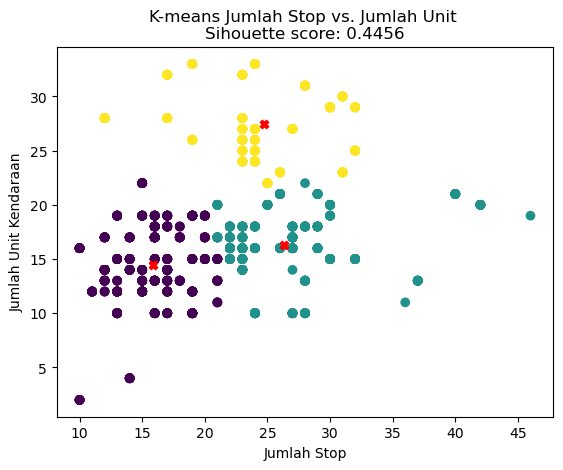

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
kmeans_silhouette = silhouette_score(data, labels)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')

plt.title("K-means Jumlah Stop vs. Jumlah Unit \nSihouette score: {:.4f}".format(kmeans_silhouette))
plt.xlabel("Jumlah Stop")
plt.ylabel("Jumlah Unit Kendaraan")
'''
for i, centroid in enumerate(centroids):
    plt.annotate("Cluster {}\n({:.1f},{:.1f})".format(i,centroid[0],centroid[1]), (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')
'''
plt.show()